In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error
import matplotlib.pylab as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import itertools

In [3]:
df = pd.read_csv('ETH-USD.csv',index_col=0,parse_dates=True)

In [4]:
df.index.freq = 'D'

In [5]:
df.shape

(1828, 6)

In [6]:
eth = df[['Close']]

In [7]:
eth

,Close
Date,
2019-08-25,186.842392
2019-08-26,188.929382
2019-08-27,187.516663
2019-08-28,173.889969
2019-08-29,169.516739
...,...
2024-08-21,2631.395508
2024-08-22,2622.951416
2024-08-23,2764.447021


In [18]:
eth['Close']

Date
2019-08-25     186.842392
2019-08-26     188.929382
2019-08-27     187.516663
2019-08-28     173.889969
2019-08-29     169.516739
                 ...     
2024-08-21    2631.395508
2024-08-22    2622.951416
2024-08-23    2764.447021
2024-08-24    2769.389648
2024-08-25    2771.085449
Freq: D, Name: Close, Length: 1828, dtype: float64

In [19]:
# horizon is 1 for 1 day predicitons
h = 1
steps = 10
Ntest = len(eth) - h - steps + 1

In [22]:
# Configuration hyperparameters to try
trend_type_list = ['add', 'mul']
seasonal_type_list = ['add', 'mul']
damped_trend_list = [True, False]
init_method_list = ['estimated', 'heuristic', 'legacy-heuristic']
use_boxcox_list = [True, False, 0]

In [20]:
def walkforward(
    trend_type,
    seasonal_type,
    damped_trend,
    init_method,
    use_boxcox,
    debug=False):

  # store errors
  errors = []
  seen_last = False
  steps_completed = 0

  for end_of_train in range(Ntest, len(df) - h + 1):
    # We don't have to manually "add" the data to our dataset
    # Just index it at the right points - this is a "view" not a "copy"
    # So it doesn't take up any extra space or computation
    train = eth.iloc[:end_of_train]
    test = eth.iloc[end_of_train:end_of_train + h]

    if test.index[-1] == df.index[-1]:
      seen_last = True
    
    steps_completed += 1

    hw = ExponentialSmoothing(
        train['Close'],
        initialization_method=init_method,
        trend=trend_type,
        damped_trend=damped_trend,
        seasonal=seasonal_type,
        seasonal_periods=12,
        use_boxcox=use_boxcox)
    res_hw = hw.fit()

    # compute error for the forecast horizon
    fcast = res_hw.forecast(h)
    error = mean_squared_error(test['Close'], fcast)
    errors.append(error)
  
  if debug:
    print("seen_last:", seen_last)
    print("steps completed:", steps_completed)

  return np.mean(errors)

In [21]:
walkforward('add', 'add', False, 'legacy-heuristic', 0, debug=True)

seen_last: True
steps completed: 10


3131.598087630393

In [24]:
# Iterate through all possible options (i.e. grid search)
tuple_of_option_lists = (
    trend_type_list,
    seasonal_type_list,
    damped_trend_list,
    init_method_list,
    use_boxcox_list,
)
for x in itertools.product(*tuple_of_option_lists):
  print(x)

('add', 'add', True, 'estimated', True)
('add', 'add', True, 'estimated', False)
('add', 'add', True, 'estimated', 0)
('add', 'add', True, 'heuristic', True)
('add', 'add', True, 'heuristic', False)
('add', 'add', True, 'heuristic', 0)
('add', 'add', True, 'legacy-heuristic', True)
('add', 'add', True, 'legacy-heuristic', False)
('add', 'add', True, 'legacy-heuristic', 0)
('add', 'add', False, 'estimated', True)
('add', 'add', False, 'estimated', False)
('add', 'add', False, 'estimated', 0)
('add', 'add', False, 'heuristic', True)
('add', 'add', False, 'heuristic', False)
('add', 'add', False, 'heuristic', 0)
('add', 'add', False, 'legacy-heuristic', True)
('add', 'add', False, 'legacy-heuristic', False)
('add', 'add', False, 'legacy-heuristic', 0)
('add', 'mul', True, 'estimated', True)
('add', 'mul', True, 'estimated', False)
('add', 'mul', True, 'estimated', 0)
('add', 'mul', True, 'heuristic', True)
('add', 'mul', True, 'heuristic', False)
('add', 'mul', True, 'heuristic', 0)
('add

In [26]:
best_score = float('inf')
best_options = None
for x in itertools.product(*tuple_of_option_lists):
  score = walkforward(*x)

  if score < best_score:
    print("Best score so far:", score)
    best_score = score
    best_options = x

Best score so far: 3143.366659035509
Best score so far: 3070.1126190887835
Best score so far: 2838.6675172254772
Best score so far: 2764.2952893895404
Best score so far: 2751.085635911254
Best score so far: 2715.9353069751164


C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimizat

Best score so far: 2506.893561609637


C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimizat

Best score so far: 2471.7438228098804


C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Korisnik\Desktop\Diplomski\Eth_price_pred

In [27]:
print("best score:", best_score)

trend_type, seasonal_type, damped_trend, init_method, use_boxcox = best_options
print("trend_type", trend_type)
print("seasonal_type", seasonal_type)
print("damped_trend", damped_trend)
print("init_method", init_method)
print("use_boxcox", use_boxcox)

best score: 2471.7438228098804
trend_type mul
seasonal_type add
damped_trend False
init_method legacy-heuristic
use_boxcox False


In [8]:
Ntest = 1
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [67]:
hw = ExponentialSmoothing(
    train['Close'],
    initialization_method='legacy-heuristic',
    trend='mul',
    damped_trend=False,
    seasonal='add',
    use_boxcox=0
)
res_hw = hw.fit()

In [68]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [70]:
df.loc[train_idx, 'TrainPred'] = res_hw.fittedvalues
df.loc[test_idx, 'Forecast'] = res_hw.forecast(Ntest)

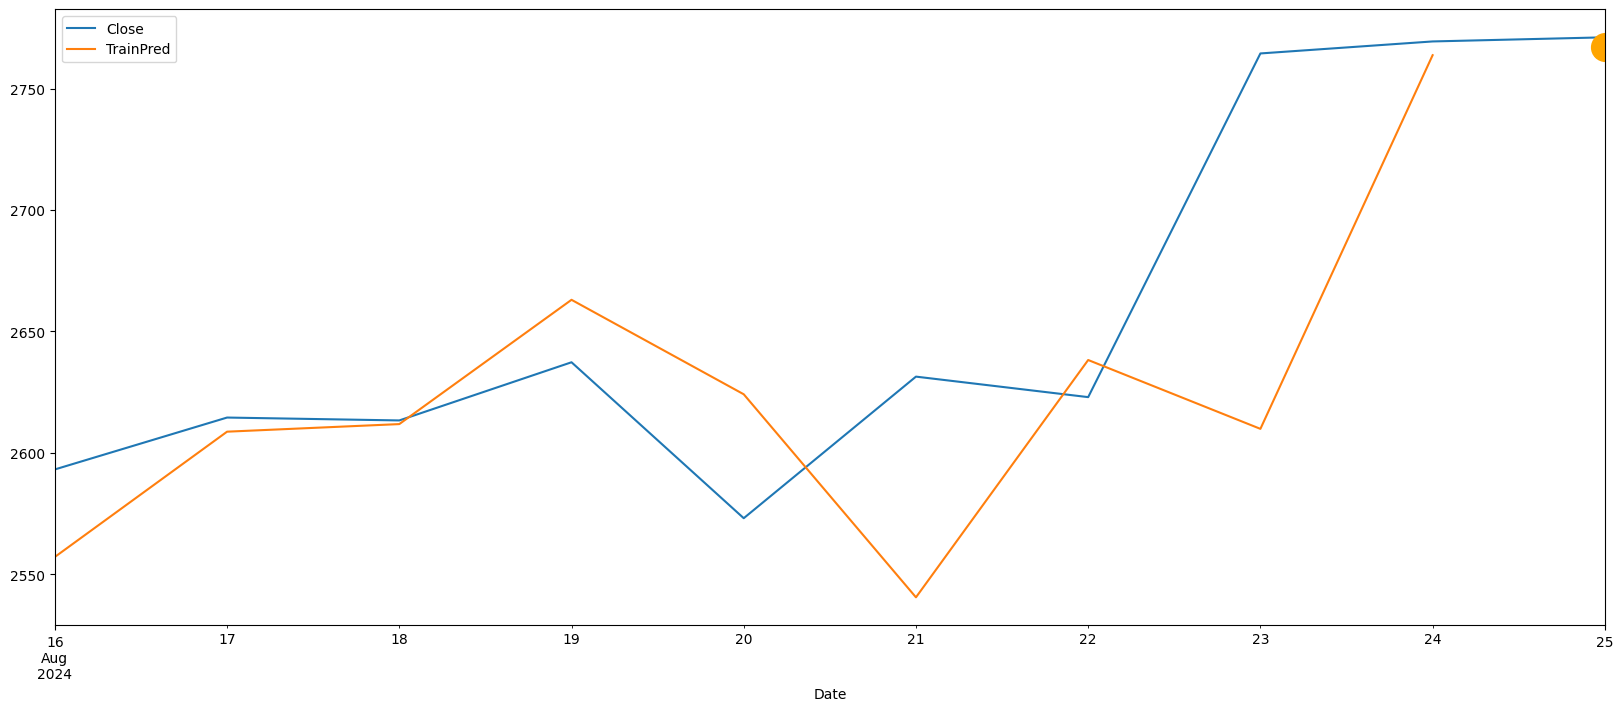

In [82]:
df[['Close', 'TrainPred']][-10:].plot(figsize=(20, 8));
plt.plot(df.loc[test_idx, 'Forecast'], marker='o',markersize=20, color='orange')

In [10]:
start = 0
real_value_10d = []
pred_value_10d = []


def get_mse(y, t):
    return np.mean((y - t) ** 2)


while True:
    end = start + 10 + 1
    if end > len(df):
        break
    temp = df.iloc[start:end].copy()
    train = df.iloc[start: start + 10]
    test = df.iloc[start + 10: end]
    assert (len(temp) == len(train) + len(test))
    hw = ExponentialSmoothing(
    train['Close'],
    initialization_method='legacy-heuristic',
    trend='mul',
    damped_trend=False,
    seasonal='add',
    use_boxcox=0
    )
    res_hw = hw.fit()
    pred_value_10d.append(res_hw.forecast(1))
    real_value_10d.append(test['Close'])
    start = start + 40 // 2
print(len(pred_value_10d))
print('###########')
print(len(real_value_10d))

91
###########
91


In [11]:
start = 0
real_value_30d = []
pred_value_30d = []


def get_mse(y, t):
    return np.mean((y - t) ** 2)


while True:
    end = start + 30 + 1
    if end > len(df):
        break
    temp = df.iloc[start:end].copy()
    train = df.iloc[start: start + 30]
    test = df.iloc[start + 30: end]
    assert (len(temp) == len(train) + len(test))
    hw = ExponentialSmoothing(
    train['Close'],
    initialization_method='legacy-heuristic',
    trend='mul',
    damped_trend=False,
    seasonal='add',
    use_boxcox=0
    )
    res_hw = hw.fit()
    pred_value_30d.append(res_hw.forecast(1))
    real_value_30d.append(test['Close'])
    start = start + 60 // 2
print(len(pred_value_30d))
print('###########')
print(len(real_value_30d))

60
###########
60


In [17]:
start = 0
real_value_100d = []
pred_value_100d = []


def get_mse(y, t):
    return np.mean((y - t) ** 2)


while True:
    end = start + 100 + 1
    if end > len(df):
        break
    temp = df.iloc[start:end].copy()
    train = df.iloc[start: start + 100]
    test = df.iloc[start + 100: end]
    assert (len(temp) == len(train) + len(test))
    hw = ExponentialSmoothing(
    train['Close'],
    initialization_method='legacy-heuristic',
    trend='mul',
    damped_trend=False,
    seasonal='add',
    use_boxcox=0
    )
    res_hw = hw.fit()
    pred_value_100d.append(res_hw.forecast(1))
    real_value_100d.append(test['Close'])
    start = start + 200 // 2
print((pred_value_100d))
print('###########')
print((real_value_100d))

[2019-12-03    153.578258
Freq: D, dtype: float64, 2020-03-12    192.025181
Freq: D, dtype: float64, 2020-06-20    254.642481
Freq: D, dtype: float64, 2020-09-28    419.220148
Freq: D, dtype: float64, 2021-01-06    1202.942704
Freq: D, dtype: float64, 2021-04-16    2528.610076
Freq: D, dtype: float64, 2021-07-25    773104.591287
Freq: D, dtype: float64, 2021-11-02    5.067863e+08
Freq: D, dtype: float64, 2022-02-10    267480.251909
Freq: D, dtype: float64, 2022-05-21    1.643425e+16
Freq: D, dtype: float64, 2022-08-29    1473.443073
Freq: D, dtype: float64, 2022-12-07    6542.69529
Freq: D, dtype: float64, 2023-03-17    28826.26912
Freq: D, dtype: float64, 2023-06-25    1894.160261
Freq: D, dtype: float64, 2023-10-03    155379.42484
Freq: D, dtype: float64, 2024-01-11    4.673472e+06
Freq: D, dtype: float64, 2024-04-20    2.405834e+10
Freq: D, dtype: float64, 2024-07-29    3249.204009
Freq: D, dtype: float64]
###########
[Date
2019-12-03    147.956421
Freq: D, Name: Close, dtype: float

In [14]:
def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [15]:
print("R2 score for 10,30 and 100 days are:",round(r2_score(real_value_10d, pred_value_10d),4),round(r2_score(real_value_30d, pred_value_30d),4),round(r2_score(real_value_100d, pred_value_100d),4))

R2 score for 10,30 and 100 days are: -359216940243987.4 -2.0714424564337457e+44 -1.0541248110106194e+25


In [16]:
print("MAPE scores for 10,30 and 100 days are:",round(mean_absolute_percentage_error(real_value_10d, pred_value_10d)*100,4), round(mean_absolute_percentage_error(real_value_30d, pred_value_30d)*100,4), round(mean_absolute_percentage_error(real_value_100d, pred_value_100d)*100,4))

MAPE scores for 10,30 and 100 days are: 99594510.824 7.4935866091991875e+22 46239873741852.15


In [ ]:
print("MAE scores for 10,30 and 100 days are:",round(mean_absolute_error(real_value_10d, pred_value_10d),2), round(mean_absolute_error(real_value_30d, pred_value_30d),2), round(mean_absolute_error(real_value_100d, pred_value_100d),2))

In [ ]:
print("MSE scores for 10,30 and 100 days are:",round(mean_squared_error(real_value_10d, pred_value_10d),2), round(mean_squared_error(real_value_30d, pred_value_30d),2), round(mean_squared_error(real_value_100d, pred_value_100d),2))

In [ ]:
print("RMSE scores for 10,30 and 100 days are:",round(root_mean_squared_error(real_value_10d, pred_value_10d),2), round(root_mean_squared_error(real_value_30d, pred_value_30d),2), round(root_mean_squared_error(real_value_100d, pred_value_100d),2))

In [ ]:
print("sMAPE scores for 10,30 and 100 days are:",round(smape(real_value_10d, pred_value_10d),4), round(smape(real_value_30d, pred_value_30d),4), round(smape(real_value_100d, pred_value_100d),4))